In [10]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
import scipy.stats as st
import hvplot.pandas

#Path to CSV
final_df_csv = Path("final_df.csv")
final_df = pd.read_csv(final_df_csv)

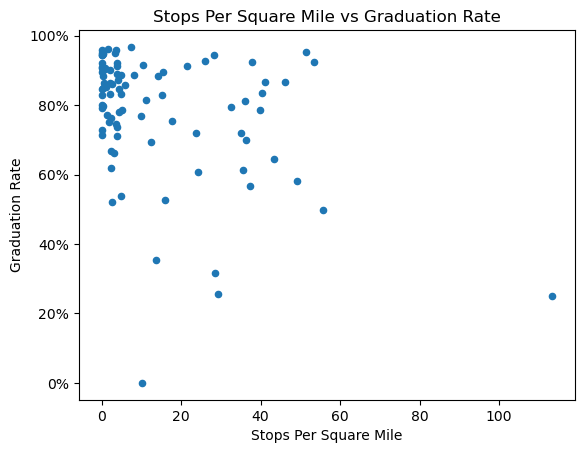

In [26]:
transport_grad = final_df.plot(kind="scatter",x="stops_per_sqmile",y="GradRate",grid=False,
                              xlabel="Stops Per Square Mile",
                              ylabel="Graduation Rate",
                              title="Stops Per Square Mile vs Graduation Rate")
transport_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))

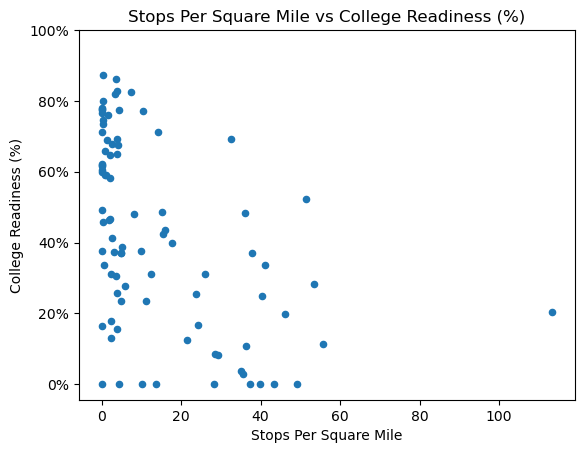

In [25]:
transport_readiness = final_df.plot(kind="scatter",x="stops_per_sqmile",y="EBRWPctReady",grid=False,
                                   xlabel="Stops Per Square Mile",
                                   ylabel="College Readiness (%)",
                                   title="Stops Per Square Mile vs College Readiness (%)")
transport_readiness.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0,decimals=0))
transport_readiness.set_ylim(top=1)
plt.show()

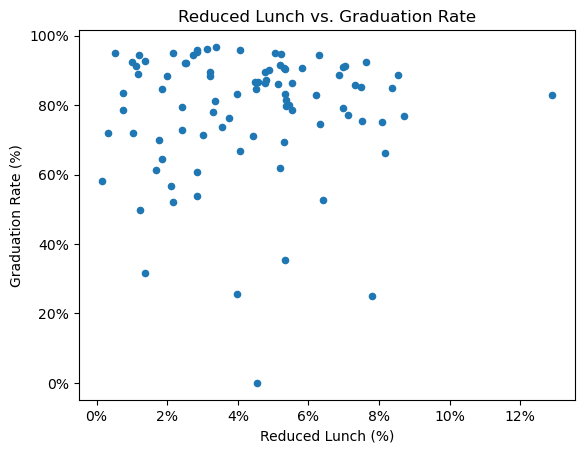

In [13]:
#Reduced Lunch vs. Grad Rate Scatter
reduced_grad = final_df.plot(kind="scatter", x="PCT_Reduced", y="GradRate", grid=False,
              xlabel="Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Reduced Lunch vs. Graduation Rate")
reduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

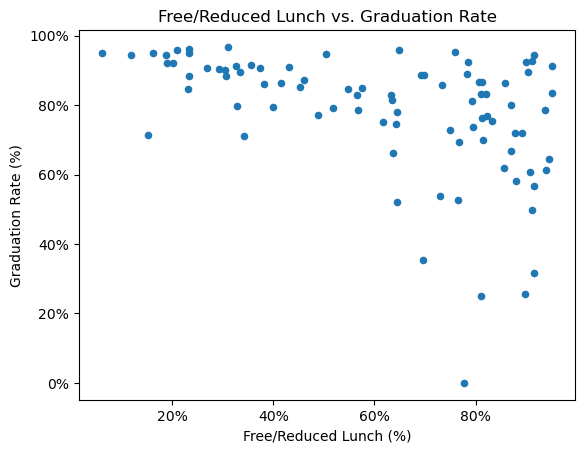

In [14]:
#Free and Reduced Lunch vs. Grad Rate Scatter
freereduced_grad = final_df.plot(kind="scatter", x="PCT_FreeReduced", y="GradRate", grid=False,
              xlabel="Free/Reduced Lunch (%)",
              ylabel="Graduation Rate (%)",
              title="Free/Reduced Lunch vs. Graduation Rate")
freereduced_grad.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
freereduced_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

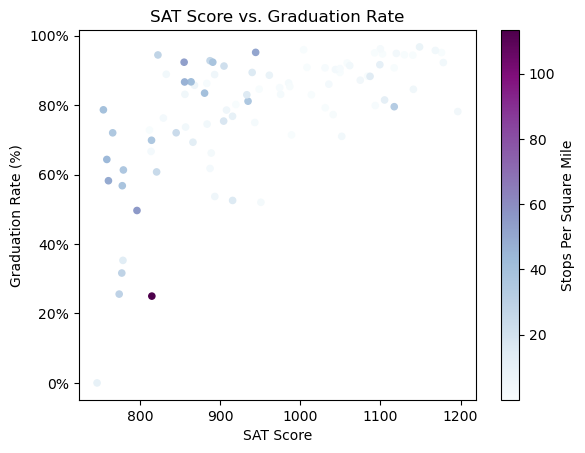

In [15]:
#SAT Scores vs. Grad Rate Scatter by Transit Stops
sat_grad = final_df.plot(kind="scatter",
                         x="FinalAllSbjtAveScore",
                         y="GradRate",
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="BuPu",
                         grid=False,
                         xlabel="SAT Score",
                         ylabel="Graduation Rate (%)",
                         title="SAT Score vs. Graduation Rate")
clb = sat_grad.collections[0].colorbar
clb.set_label("Stops Per Square Mile")
sat_grad.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

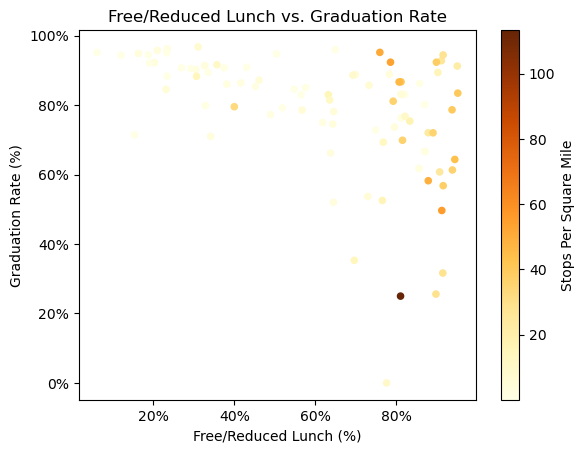

In [16]:
reduced_grad_by_stops_per_sqmile = final_df.plot(kind="scatter",
                         x="PCT_FreeReduced",
                         y="GradRate",
                         c=final_df["stops_per_sqmile"],
                         colorbar=True,
                         cmap="YlOrBr",
                         grid=False,
                         xlabel="Free/Reduced Lunch (%)",
                         ylabel="Graduation Rate (%)",
                         title="Free/Reduced Lunch vs. Graduation Rate")
clb = reduced_grad_by_stops_per_sqmile.collections[0].colorbar
clb.set_label("Stops Per Square Mile")
reduced_grad_by_stops_per_sqmile.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))
reduced_grad_by_stops_per_sqmile.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0, decimals=0))

In [27]:
map_plot = final_df.hvplot.points("Longitude",
                                  "Latitude",
                                  geo=True,
                                  tiles = "OSM",
                                  frame_width = 900,
                                  frame_height=700,
                                  size="AllSbjtPctReady",
                                  scale=20.0,
                                  color="stops_per_capita",
                                  hover_cols=["PCT_FreeReduced","Zipcode"]
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (stops_per_capita,AllSbjtPctReady,PCT_FreeReduced,Zipcode)